# Applied Statistics #

## Tasks ##

This notebook contains my work for four tasks which form part of the assessment for the Applied Statistics module of the Higher Diploma in Data Analytics from ATU.

### Task 1: Permutations and Combinations ###

This task involves a slight modification of Ronald A. Fisher's "Lady Tasting Tea" experiment from 1935. This experiment involves making eight cups of tea, four of which have the tea put in first followed by the milk and the other four with the milk put in first followed by the tea; the lady referred to in the name of the experiment then tastes each cup of tea and tries to determine which cups had the milk put in first. Instead of using eight cups, we will analyse the experiment including twelve cups of tea.

The task as outlined by the lecturer is as follows:

*Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.*

*1. Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.*

*2. Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.*

*3. Would you accept two errors? Explain.*

<img src="https://www.teamuse.com/img/articles/000804_1.jpg" width="300">

To complete this task, I will first install the same libraries that the lecturer installed before he analysed the original version of the experiment:

In [231]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt



To answer the first question, we need to find the probability of correctly guessing 6 cups of tea out of 12 cups. The order that we select the 6 cups does not matter, so we are looking for the correct combination of 6 cups from the 12 cups. 

*If* we cared about the order the cups were selected, we would be seeking a **permutation** of the 12 listed a specific order, including the 6 cups with the milk put in first. 

Instead, to calculate the **combination** of 6 cups from 12, we can use the `math.comb()` method:

In [232]:
# Firstly we calculate the number of ways of selecting any 6 cups from the 12 cups
all_combinations = math.comb(12,6)

# The probability of selecting the one correct combination of 6 cups correctly from the 12 cups
prob_6_correct = 1 / all_combinations

# Printing the probability result out to four decimal places
print(f"The probability of correctly selecting all 6 'milk-first' cups is {round(prob_6_correct, 4)}.")

The probability of correctly selecting all 6 'milk-first' cups is 0.0011.


For the next question, we need to calculate the probability that the person makes *at most* one error. This means that they either select 5 of the 6 cups correctly, or else they select all 6 correctly. To find the probability of this happening if the person has no special power to guess, we find the probability of selecting 5 cups correctly and add it to the probability of selecting all 6 correctly, which was calculated in the answer to the first question above.

The probability of correctly selecting 5 out of the 6 'milk-first' cups requires us to work out how many combinations of 5 'milk-first' cups can be selected from the 6 'milk-first' cups and then multiplying this number of scenarios by the number of ways it is then possible to select 1 of the remaining 'tea-first' cups; this answer to the latter part is simply 6, as there are only 6 'tea-first' cups to choose from.

In [233]:
# Finding the number of combinations of 5 milk-first cups out of the 6 available, and multiplying it by the number of ways to 
# select 1 tea-first cup from the remaining 6 such cups
ways_5_correct = math.comb(6,5) * math.comb (6,1)

# dividing the above figure by the number of ways of selecting any 6 cups from the 12 cups
prob_5_correct = ways_5_correct / all_combinations

# finding the probability of selecting at most 1 wrong ie. at least 5 out of 6 correct
prob_5_or_6_correct = prob_5_correct + prob_6_correct

# Printing the probability result out to four decimal places
print(f"The probability of correctly selecting at least 5 of the 'milk-first' cups is {round(prob_5_or_6_correct, 4)}.")


The probability of correctly selecting at least 5 of the 'milk-first' cups is 0.04.


The third part of this task asks us to consider whether we would accept two errors. Another way of phrasing this might be, would we consider selecting 4 out of the 6 'milk-first' cups to be indicative of a special ability to determine whether a cup of tea had the milk or tea poured into it first, or would we consider the probability too high that somebody who doesn't have such a special ability could correctly select 4 'milk-first' cups by chance?

To calculate the probability of selecting 4 or more of the 'milk-first' cups correctly, we can do a similar calculation to the one we did to calculate the probability of selecting 5 or more correctly:

In [234]:
# The number of ways to select 4 out of the 6 'milk-first' cups multiplied by the number of ways to select 2 out of the 6 'tea-first' cups.
ways_4_correct = math.comb(6,4) * math.comb (6,2)

# dividing the above figure by the number of ways of selecting any 6 cups from the 12 cups
prob_4_correct = ways_4_correct / all_combinations

# finding the probability of selecting at most 2 wrong ie. at least 4 out of 6 correct, using the result from the last question
prob_4_or_5_or_6_correct = prob_4_correct + prob_5_or_6_correct

# Printing the result out to four decimal places
print(f"The probability of correctly selecting at least 4 of the 'milk-first' cups is {round(prob_4_or_5_or_6_correct, 4)}.")

The probability of correctly selecting at least 4 of the 'milk-first' cups is 0.2835.


To visualise how relatively likely selecting 4 'milk-first' cups correctly is compared with other possible outcomes, I will create a bar chart of the probability of each of the 7 possible outcomes (ie. selecting from 0 to 6 'milk-first' cups). To do this, I will first need to calculate each probability using the same combinations calculation I used for the probability of selecting 4, 5 and 6 'milk-first' cups correctly:

In [235]:
ways_0_correct = math.comb(6,0) * math.comb(6,6)
prob_0_correct = ways_0_correct / all_combinations

ways_1_correct = math.comb(6,1) * math.comb(6,5)
prob_1_correct = ways_1_correct / all_combinations

ways_2_correct = math.comb(6,2) * math.comb(6,4)
prob_2_correct = ways_2_correct / all_combinations

ways_3_correct = math.comb(6,3) * math.comb(6,3)
prob_3_correct = ways_3_correct / all_combinations


I will now plot all seven probability figures on a bar chart:

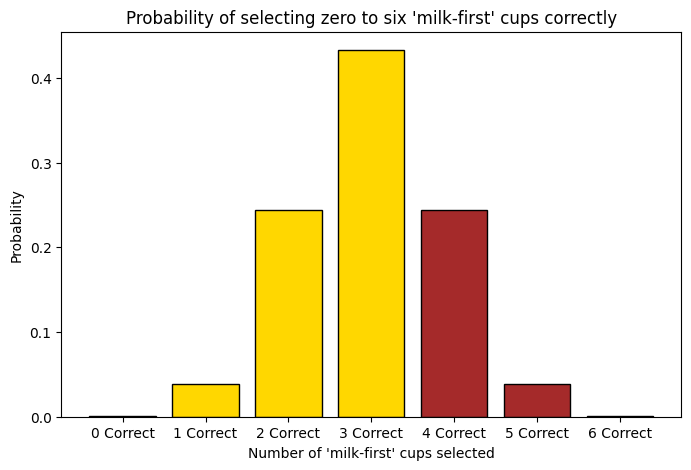

In [236]:
# Create a list of outcomes to include in the bar chart across the x-axis, and the probabilities of each outcome across the y-axis
outcomes = ["0 Correct", "1 Correct", "2 Correct", "3 Correct", "4 Correct", "5 Correct", "6 Correct"]
probabilities = [prob_0_correct, prob_1_correct, prob_2_correct, prob_3_correct, prob_4_correct, prob_5_correct, prob_6_correct]

# To colour the bars for 4 or more cups differently to the bars for 3 or fewer cups, we can use an if-else statement
colours = ["gold" if outcome in ["0 Correct", "1 Correct", "2 Correct", "3 Correct"] else "brown" for outcome in outcomes]

# plotting the bar chart 
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
plt.figure(figsize=(8, 5))

# Passing in the numerical data for each outcome, colouring the bars, and giving the bars darkened sides to improve appearance
# https://python-graph-gallery.com/3-control-color-of-barplots/
plt.bar(outcomes, probabilities, color=colours, edgecolor='black')
plt.xlabel("Number of 'milk-first' cups selected")
plt.ylabel("Probability")
plt.title("Probability of selecting zero to six 'milk-first' cups correctly")
plt.show()

From looking at this bar chart, I am even more convinced that allowing a person the chance to make two errors is too generous an allowance to give, as such an outcome if not unlikely by any means.

### Task 2: numpy's Normal Distribution ###

The lecturer's instruction for this task is as follows:

*1. In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.*

*Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.*

*2. Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.*

Before beginning this task, I will import additional libraries used by the lecturer when demonstrating the normal distribution with his code:

In [237]:
# For solving statistical problems
import scipy.stats as stats

# Statistical models
import statsmodels as sm

To generate a sample of 100,000 vaues using the *nump.random.normal()* function, with mean 10.0 and deviation 3.0, we pass in the arguments as below:

In [238]:
# reference: https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html
data = np.random.normal(loc=10.0, scale=3.0, size=100000)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a Normal distribution. If the result obtained is extreme enough, we take it as evidence that the null hypothesis is false and that the data is *not* normally distributed. The inverse is not true ie. a non-extreme result cannot be taken as evidence that the data *is* normally distributed. The value of this statistic tends to be high (close to 1) for samples drawn from a normal distribution.

In [239]:
# Perform the Shapiro Wilk test.
stats.shapiro(data)

C:\Users\james\AppData\Local\Temp\ipykernel_10332\497950592.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stats.shapiro(data)


ShapiroResult(statistic=0.9999707593619878, pvalue=0.6241344428420903)

I will now plot a histogram of the data with the Normal Distribution probability density function plotted on top of it:

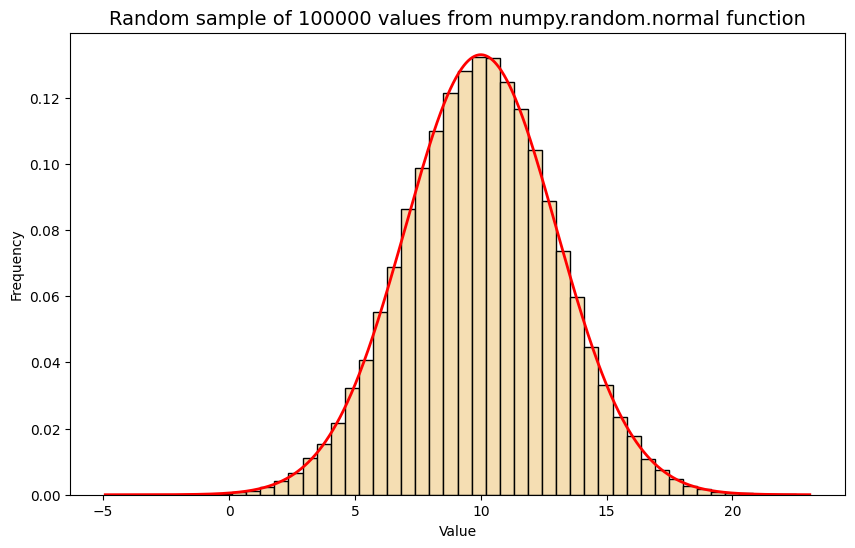

In [240]:
# Importing the norm.pdf function to allow us to create the the Normal distribution probability density function
from scipy.stats import norm

# Creating a blank plot where we will plot both the histogram of our 100000 values and the Normal distribution pdf
fig, ax = plt.subplots(figsize=(10, 6))

# Passing in the random sample data, colouring the bars, and giving the bars darkened sides to improve appearance
plt.hist(data, bins=50, color='wheat', density = True, edgecolor='black')

# Generating 1001 evenly-separated numbers between the minimum and maximum of the data generated above:
x_axis_pdf = np.linspace(min(data), max(data), 1001)

# Here we use the norm() function from scipy.stats  to create a Normal Distribution probability density function (pdf):
# We colour it red, with linewidth = 2.
plt.plot(x_axis_pdf, norm.pdf(x_axis_pdf, 10, 3), '-r', linewidth = 2)

# Adding the title and labels for the axes:
plt.title("Random sample of 100000 values from numpy.random.normal function", fontsize = 14)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Task 3: t-Test Calculation ###

In Task 3, the lecturer has asked us to *consider a dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.*

We are asked to *calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.*

The below table of data was provided, which I will convert into a pandas dataframe to complete the task:

![resting heart rate data](img/task-3-data.jpg)

In [241]:
# import pandas to allow us to create a dataframe
import pandas as pd

# storing the data in arrays
patient_ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
heart_rate_before = [63, 68, 70, 64, 74, 67, 70, 57, 66, 65]
heart_rate_after = [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]

# creating the dataframe
heart_rate_data = {
    "Patient ID": patient_ids,
    "Before": heart_rate_before,
    "After": heart_rate_after
}

df = pd.DataFrame(heart_rate_data)

print(df)

   Patient ID  Before  After
0           0      63     64
1           1      68     64
2           2      70     68
3           3      64     64
4           4      74     73
5           5      67     70
6           6      70     72
7           7      57     54
8           8      66     61
9           9      65     63


Since this dataset consists of 'before' and 'after' data for each patient, the 'before' and 'after' data points can be considered paired data for each patient. Therefore, the t-test we will perform is the paired difference t-test.

Before performing this t-test, however, we will plot the 'before' and 'after' data on a histogram to get a sense of how the data is distributed:

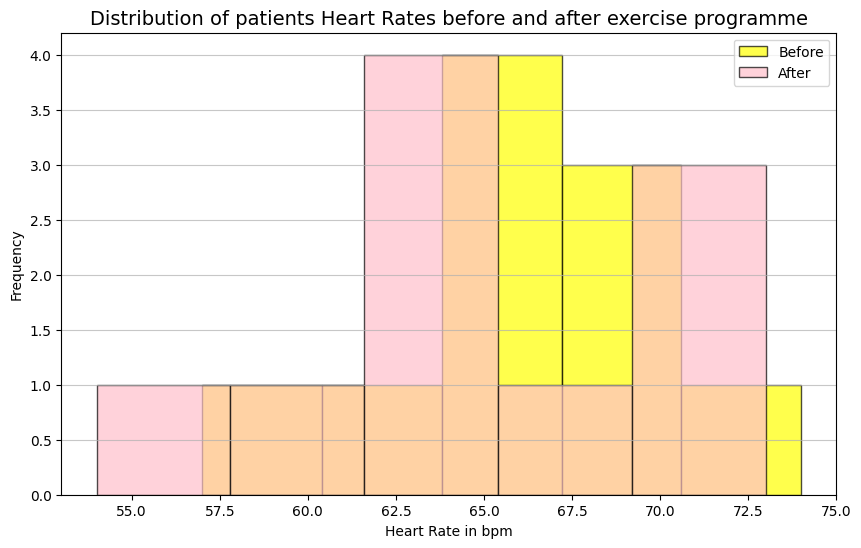

In [255]:
# creating a new figure and setting the size of it
plt.figure(figsize=(10, 6))

# Histogram for heart_rate_before. By using the alpha paramter we can make the plot slightly transparent to allow
# us to overlap the heart_rate_before data with the heart_rate_after data:
plt.hist(heart_rate_before, bins=5, alpha= 0.7, label='Before', color='yellow', edgecolor='black')

# Histogram for heart_rate_after:
plt.hist(heart_rate_after, bins=5, alpha=0.7, label='After', color='pink', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of patients Heart Rates before and after exercise programme', fontsize=14)
plt.xlabel('Heart Rate in bpm', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=10)

# Show plot, including a transparent grid on the y-axis
plt.grid(axis='y', alpha=0.70)
plt.show()

Here we can see that the "after" data has a distribution shifted to the left compared with the "before" data.

We will now use the pre-built function `ttest_rel` from scipy stats to calculate this statistic:

In [243]:
from scipy.stats import ttest_rel

# Passing in the data in the Before and After columns of the pandas dataframe created above
t_stat, p_value = ttest_rel(df["Before"], df["After"])

print(f"The T-statistic is {t_stat}")
print(f"The p_value is {p_value}")


The T-statistic is 1.337227482480628
The p_value is 0.21396011317404623


Next, we will calculate this statistic ourselves. 

In this test, the null hypothesis is that the mean difference between the blood pressure of patients before and after treatment is equal to zero. 

The alternative hypothesis is that the mean difference between the blood pressure of patients before and after treatment is **not** equal to zero. 

The T-statistic is calculated as T = Mean difference/ (Standard error of mean difference), with n-1 degrees of freedom.


In [244]:
# Firstly I will calculate an array of differences for the before and after columns by subtracting an array of the after values
# from an array of the before values
differences = np.array(heart_rate_before) - np.array(heart_rate_after)

print(differences)

[-1  4  2  0  1 -3 -2  3  5  2]


Next I will find the mean of these differences across the number of patients studied. For this task, we are examining the data of ten patients:

In [245]:
# Here the len function returns the number of items in the array 'patient_ids'
n = len(patient_ids)

# Here the sum function sums up the contents of the 'differences' array calculated above
sum_diff = sum(differences)

# This divides the second figure by the first
mean_diff = sum_diff/n 

print(mean_diff)

1.1


I will now calculate the standard error, which is equal to the (standard deviation/Sqrt n). 

Firstly, I will calculate the standard deviation:

In [246]:
# The first step is to calculate the extent to which each of the ten figures for the difference between 'before' and 'after' 
# measurement deviates from the mean of all the differences between 'before' and 'after' measurements
# I will store these differences in an array
deviations = np.array(differences) - np.array(mean_diff)

squared_deviations = deviations ** 2

sum_squared_deviations = np.sum(squared_deviations)

variance = sum_squared_deviations/ (n - 1)

s = np.sqrt(variance)

print(s)


2.6012817353502227


To calculate the standard error, we divide the standard deviation by the square root of n:

In [247]:
standard_error = s/np.sqrt(n)

print(standard_error)

0.8225975119502043


Finally, the T-statisic can be calculated as Mean difference/ standard error:

In [248]:
# T-statistic
t_stat = mean_diff/ standard_error

print(f"The manually calculated T-statistic is {t_stat}")

The manually calculated T-statistic is 1.3372274824806283


This figure for the T-statistic (approx 1.3372) is the same as that calculated using the built in function `ttest_rel` from scipy stats.

### Task 4: ANOVA ###

The lecturer's instructions for this Task are as follows: 

*In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.*

*Now use a loop to perform the following test 10,000 times.*

*Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.*

*Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.*

*Summarize and explain your results.*

We are asked to increment the value of 'no_type_ii' by 1 each time a type II error occurs. A type II error means we fail to reject the null hypothesis even though it is false. In the context of this experiment, the null hypothesis is that the mean of each sample is equal ie. **μ1 = μ2 = μ3** where μ1 is the mean of sample 1, μ2 is the mean of sample 2 and μ3 is the mean of sample 3. If any of these three means differ from one another, the null hypothesis is false.

Since we generated the samples with different means, we would expect the means to be different from each other and to reject the null hypothesis. 

To investigate whether the null hypothesis might be false, we can use scipy.stats `f_oneway` function to calculate the F-statistic for a one-way ANOVA, along with the associated p_value. The F-statistic compares the level of variation between groups with the level of variation within groups. The p-value describes the probability of observing a result as extreme as the result which was found, if the null hypothesis was true ie. μ1 = μ2 = μ3.

In [249]:
# First we create a variable called 'no_type_ii' and initialise it as being equal to zero
no_type_ii = 0

# Next we create three samples, each with a standard deviation of 0.1 but with slightly differing means.
# Here loc = mean, and scale = standard deviation
# We will generate three samples of size 100, 10000 times:
for i in range(10000):

    # Here we are generating the samples
    sample1 = np.random.normal(loc=4.9, scale=0.1, size=100)  
    sample2 = np.random.normal(loc=5.0, scale=0.1, size=100)
    sample3 = np.random.normal(loc=5.1, scale=0.1, size=100)

    # Here we are constructing a data frame to allow us to use the f_oneway function from scipy stats to find the F-statistic and p-value
    # for each of the 10000 iterations of this experiment
    df = pd.DataFrame({'Sample1': sample1, 'Sample2': sample2, 'Sample3': sample3})

    # Here we perform a one-way ANOVA between the three different samples within the data frame just created
    f_statistic, p_value = stats.f_oneway(df['Sample1'], df['Sample2'], df['Sample3'])

    if p_value > 0.05:
        no_type_ii += 1

print('The value of no_type_ii is given below:')
print(no_type_ii)
print()
print(f'An example of an F-statistic from these 10,000 iterations is {f_statistic} and the accompanying p-value is {p_value}')

The value of no_type_ii is given below:
0

An example of an F-statistic from these 10,000 iterations is 99.16609938499978 and the accompanying p-value is 1.0284746012056903e-33


We find that the F-statistics are very high, and across 10,000 iterations of generating samples of 100 values with the prescribed means and standard deviations, we find that at no point is the p-value greater than 0.05; the value of no_type_ii does not become incremented at all over the course of 10000 iterations.

In fact, a quick look at the p-values shows that, under the assumption that the null hypothesis of equal means is true, the likelihood of outcomes as extreme as those which did happen is bordering on impossible. To put in context what even a probability of 1 x e^-30 means: the universe is around 4.35 x 10^17 seconds old (universe age = 13.787 billion years of 365.2425 days), so if this experiment was performed 1 trillion (10^12) times per second since the universe was formed, there is a good chance you still wouldn't get means so different as those generated here, if the means are inherently the same for each sample.

We can perform a post-hoc test on the samples generated. We will use Tukey's honestly significant difference test (HSD):


In [250]:
res = stats.tukey_hsd(df['Sample1'], df['Sample2'], df['Sample3'])

print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.095     0.000    -0.126    -0.063
 (0 - 2)     -0.189     0.000    -0.220    -0.157
 (1 - 0)      0.095     0.000     0.063     0.126
 (1 - 2)     -0.094     0.000    -0.125    -0.062
 (2 - 0)      0.189     0.000     0.157     0.220
 (2 - 1)      0.094     0.000     0.062     0.125



Here we can see that for each of the six pairwise comparisons of groups, the 95% confidence interval of estimate of the difference between the means of each group do not contain zero. We can also see that p-value for each of the six pairwise combinations is zero (to within three decimal places), indicating that the liklihood of the former result happening under the assumption of equal group means is very unlikely.

### References ###

#### Task 1 ####

1.	(multiple authors) n/d. *Lady tasting tea*. Wikipedia.org. Retrieved 19th December 2024 from https://en.wikipedia.org/wiki/Lady_tasting_tea. 

2.	(Hill, E) 4th August 2000. *The history of Women and Tea*. Teamuse.com. Retrieved 19th December 2024 from https://www.teamuse.com/article_000804.html (image used from article)

3.	(‘pudepied’) March 7th 2018. *Resize the image in jupyter notebook using markdown*. Stackoverflow.com. Retrieved 19th December 2024 from https://stackoverflow.com/questions/41598916/resize-the-image-in-jupyter-notebook-using-markdown/49150804#49150804 

4.	(author/s unknown) 10th December 2024. *Bar Plot in Matplotlib*. Geeksforgeeks.com. Retrieved 19th December 2024 from https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

5.	(Holtz, Y) n/d. *Control the color of barplots built with matplotlib*. Python-graph-gallery.com. Retrieved 19th December 2024 from https://python-graph-gallery.com/3-control-color-of-barplots/ 


#### Task 2 ####

6.	(author/s unknown) n/d. *numpy.random.normal* numpy.org. Retrieved 19th December from https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html

7.	(author/s unknown) n/d. *Scipy.stats.shapiro*. docs.scipy.org.  Retrieved 19th December 2024 from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

8.	(author/s unknown) n/d. *matplotlib.pyplot.subplots()*. matplotlib.org. Retrieved 19th December 2024 from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

9.	(author/s unknown) n/d. *matplotlib.pyplot.hist*. matplotlib.org. Retrieved 19th December 2024 from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

10.	(author/s unknown) n/d. *numpy.linspace*. numpy.org. Retrieved 19th December from https://numpy.org/doc/stable/reference/generated/numpy.linspace.html


#### Task 3 ####

11.	(author/s unknown) n/d. *scipy.stats.ttest_rel* Docs.scipy.org. Retrieved 19th December 2024 from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

12.	(author/s unknown) n/d. *Student’s t-test*. Wikipedia.org. Retrieved 19th December 2024 from https://en.wikipedia.org/wiki/Student's_t-test 

13.	(Shier, R) (2004) *statistics 1.1 Paired T-tests* Statstutor.ac.uk. Retrieved 19th December 2024 from https://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf


#### Task 4 ####

14.	(authors unknown) n/d. *analysis of variance* Wikipedia.org. Retrieved 19th December 2024 from https://en.wikipedia.org/wiki/Analysis_of_variance 

15.	(author/s unknown) n/d. *F-test*. Wikipedia.org. Retrieved 19th December 2024 from https://en.wikipedia.org/wiki/F-test

16.	(author/s unknown) n/d. *scipy.stats.f_oneway*. docs.scipy.org. Retrieved 19th December 2024 from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

17.	(author/s unknown) n/d. *Age of the Universe*. Wikipedia.org. Retrieved 19th December 2024 from https://en.wikipedia.org/wiki/Age_of_the_universe

18.	(author/s unknown) n/d *Post Hoc Tests – Tukey HSD*. Biostats.w.uib.no. Retrieved 19th December 2024 from https://biostats.w.uib.no/post-hoc-tests-tukey-hsd/

19.	(author/s unknown) n/d. *scipy.stats.tukey_hsd*. Docs.scipy.org. Retrieved 19th December 2024 from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
